In [6]:
import missingno as msno
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
import io
from PIL import Image

def del_same_feature(data):
    '''
    删除方差为0的列（全部相同）
    :param data: 读取的数据集，只含特征，dataframe
    :returns: 清洗后的dataframe
    '''
    # 全类型通用，包括字符串
    data = data.loc[:, (data != data.iloc[0]).any()]
    # 仅适用于数值类型
    #data.drop(data.columns[data.std() == 0], axis=1, inplace=True)
    return data

def del_perc_same_feature(data, threshold):
    '''
    删除相同比列高于阈值的列
    :param data: 读取的数据集，只含特征，dataframe
    :param threshold: 阈值，某个值占比超过阈值的列会被删除
    :return: 清洗后的dataframe，并打印所删除的特征名
    '''
    # 待删除的列存放
    column_indexs = []
    # 按列遍历dataframe
    for column_index, row_data in data.iteritems():
        counts = row_data.value_counts(normalize=True)
        # 若占比最大的某个值超过阈值，则记入待删除列
        if counts.iloc[0] >= threshold:
            column_indexs.append(column_index)
    print("删除的特征为：" + str(column_indexs))
    data = data.drop(labels=column_indexs, axis=1)
    return data

def del_std_small_feature(data, threshold):
    '''
    删除方差小于阈值的列
    :param data: 读取的数据集，只含特征，dataframe
    :param threshold: 阈值，方差小于阈值的列会被删除
    :return: 清洗后的dataframe
    '''
    # 待删除的列存放
    column_indexs = []
    # 按列遍历dataframe
    for column_index, row_data in data.iteritems():
        counts = row_data.std()
        # 若占比最大的某个值超过阈值，则记入待删除列
        if counts <= threshold:
            column_indexs.append(column_index)
    print("删除的特征为：" + str(column_indexs))
    data = data.drop(labels=column_indexs, axis=1)
    return data

def save_png_to_tiff(name):
    '''
    保存图表为PNG和TIFF两种格式
    :param name: 文件名
    :return: tiff-dpi：200 → 2594x1854
    '''
    plt.savefig('./fig_preview/' + name + '.png')
    # Save the image in memory in PNG format
    png1 = io.BytesIO()
    plt.savefig(png1, format="png", dpi=200, pad_inches=.1, bbox_inches='tight')
    # Load this image into PIL
    png2 = Image.open(png1)
    # Save as TIFF
    png2.save('./fig_preview/' + name + ".tiff")
    png1.close()

def draw_feature(data):
    '''
    选择整型、浮点型变量各16个画出分布图
    :param data: 特征
    :return: 特征分布图，png 1600x1000, tiff-dpi：200 → 2594x1854
    '''
    # 数据准备
    # 遍历每列的类型，分成整型和浮点型
    columns_int = []
    columns_float = []
    for column_index in data.columns:
        if str(type(data[column_index][0])) == "<class 'numpy.int64'>":
            columns_int.append(column_index)
        if str(type(data[column_index][0])) == "<class 'numpy.float64'>":
            columns_float.append(column_index)
    # 随机选择16个特征做分布图，整形做条形图，浮点型会多一个拟合曲线
    columns_int_samples = random.sample(columns_int, 16)
    columns_float_samples = random.sample(columns_float, 16)
    print("选取的整型变量为："+str(columns_int_samples))
    print("选取的浮点变量为："+str(columns_float_samples))
    # # 根据实际情况也可手动指定
    # columns_int_samples = []
    # columns_float_samples = []
    # 清理空值
    data = data.dropna()

    # 开始画图
    # 预设
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    # 整体画布大小 1600x1000 tiff-dpi：200 → 2594x1854
    plt.figure(figsize=(16, 10))
    # 绘制16个整型变量子图
    for i in range(1,17):
        plt.subplot(4,4,i)
        sns.distplot(data[columns_int_samples[i-1]], bins=15, kde=False, hist=True, hist_kws={'histtype':'stepfilled'},
                     color='deepskyblue')
    plt.subplots_adjust(hspace=0.35)
    # 可选添加标题
    title = ''
    plt.suptitle(title, fontsize=20)
    # 文件名
    name = '整型变量直方图'
    save_png_to_tiff(name)
    plt.show()

    # 绘制16个浮点型变量子图
    plt.figure(figsize=(16, 10))
    for i in range(1,17):
        plt.subplot(4,4,i)
        sns.distplot(data[columns_float_samples[i-1]], hist=True, norm_hist=False, color='deepskyblue')
    plt.subplots_adjust(wspace=0.3, hspace=0.35)
    # 可选添加标题
    title = ''
    plt.suptitle(title, fontsize=20)
    # 文件名
    name = '浮点变量直方图'
    save_png_to_tiff(name)
    plt.show()

def palette():
    '''
    调色板
    :return:
    '''
    # 标准彩色调色板，12色
    sns.palplot(sns.hls_palette(12, l=0.7, s=0.9))
    sns.palplot(sns.diverging_palette(240, 10, sep=12))
    # cmap = sns.diverging_palette(200, 20, as_cmap=True)
    sns.palplot(sns.color_palette('rainbow', 12))

    # 自定义
    colors = ["deepskyblue", "salmon"]
    # colors = ['#00bfff', '#fa8072']
    sns.palplot(sns.color_palette(colors))
    plt.show()

# setting
file = './dataset/Molecular_Descriptor.xlsx'
data = pd.read_excel(file)
#删掉第一列，分子结构，只保留特征
data = data.iloc[:,1:]
print(data.info)
# [1974 rows x 729 columns]>

<bound method DataFrame.info of       nAcid   ALogP    ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0 -0.2860  0.081796  126.1188  74.170169          12         12   
1         0 -0.8620  0.743044  131.9420  80.357341          12         12   
2         0  0.7296  0.532316  139.9304  74.064997          18         18   
3         0 -0.3184  0.101379  133.4822  80.357341          12         12   
4         0  1.3551  1.836296  143.1903  76.356583          18         18   
...     ...     ...       ...       ...        ...         ...        ...   
1969      0  1.8193  3.309852  177.6817  89.159790          24         24   
1970      0  1.6903  2.857114  167.6057  82.972618          24         24   
1971      0  1.6903  2.857114  167.6057  82.972618          24         24   
1972      0  1.3365  1.786232  125.5605  63.287860          18         18   
1973      0  1.8193  3.309852  177.6817  89.159790          24         24   

      nAtom  nHeavyAtom  nH  ...          M

In [7]:
# testing
data = del_same_feature(data)
print(data.info)
# [1974 rows x 504 columns]>

<bound method DataFrame.info of       nAcid   ALogP    ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0 -0.2860  0.081796  126.1188  74.170169          12         12   
1         0 -0.8620  0.743044  131.9420  80.357341          12         12   
2         0  0.7296  0.532316  139.9304  74.064997          18         18   
3         0 -0.3184  0.101379  133.4822  80.357341          12         12   
4         0  1.3551  1.836296  143.1903  76.356583          18         18   
...     ...     ...       ...       ...        ...         ...        ...   
1969      0  1.8193  3.309852  177.6817  89.159790          24         24   
1970      0  1.6903  2.857114  167.6057  82.972618          24         24   
1971      0  1.6903  2.857114  167.6057  82.972618          24         24   
1972      0  1.3365  1.786232  125.5605  63.287860          18         18   
1973      0  1.8193  3.309852  177.6817  89.159790          24         24   

      nAtom  nHeavyAtom  nH  ...          M

In [8]:
data = del_perc_same_feature(data, 0.9)
print(data.info)
# [1974 rows x 362 columns] >

删除的特征为：['nAcid', 'nP', 'nCl', 'nBr', 'nI', 'nBondsT', 'C1SP1', 'C2SP1', 'SCH-3', 'SCH-4', 'VCH-3', 'VCH-4', 'nwHBd', 'nHdNH', 'nHsSH', 'nHsNH2', 'nHaaNH', 'nHtCH', 'nHdCH2', 'nHCHnX', 'ndCH2', 'ntCH', 'ntsC', 'nsNH2', 'ndNH', 'naaNH', 'ntN', 'ndsN', 'naasN', 'nssssNp', 'nsOm', 'ndsssP', 'nsSH', 'ndS', 'naaS', 'ndssS', 'nddssS', 'nsCl', 'nsBr', 'nsI', 'SwHBd', 'SHdNH', 'SHsSH', 'SHsNH2', 'SHaaNH', 'SHtCH', 'SHdCH2', 'SHCHnX', 'SdCH2', 'StCH', 'StsC', 'SsNH2', 'SdNH', 'SaaNH', 'StN', 'SdsN', 'SaasN', 'SssssNp', 'SsOm', 'SdsssP', 'SsSH', 'SdS', 'SaaS', 'SdssS', 'SddssS', 'SsCl', 'SsBr', 'SsI', 'minwHBd', 'minHdNH', 'minHsSH', 'minHsNH2', 'minHaaNH', 'minHtCH', 'minHdCH2', 'minHCHnX', 'mindCH2', 'mintCH', 'mintsC', 'minsNH2', 'mindNH', 'minaaNH', 'mintN', 'mindsN', 'minaasN', 'minssssNp', 'minsOm', 'mindsssP', 'minsSH', 'mindS', 'minaaS', 'mindssS', 'minddssS', 'minsCl', 'minsBr', 'minsI', 'maxwHBd', 'maxHdNH', 'maxHsSH', 'maxHsNH2', 'maxHaaNH', 'maxHtCH', 'maxHdCH2', 'maxHCHnX', 'maxdCH2'

In [9]:
data = del_std_small_feature(data, 0.05)
data
# [1974 rows x 341 columns] >

删除的特征为：['BCUTc-1l', 'VCH-5', 'VC-6', 'ETA_AlphaP', 'ETA_dAlpha_B', 'ETA_Epsilon_2', 'ETA_Epsilon_3', 'ETA_Epsilon_4', 'ETA_Epsilon_5', 'ETA_dEpsilon_B', 'ETA_dEpsilon_C', 'ETA_dEpsilon_D', 'ETA_Psi_1', 'ETA_dPsi_A', 'ETA_Shape_X', 'ETA_BetaP_s', 'ETA_BetaP_ns_d', 'ETA_EtaP_B', 'ETA_EtaP_B_RC', 'PetitjeanNumber', 'WTPT-2']


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,VAdjMat,MW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,26,...,5.954196,439.218115,64.771680,15.471445,8.858910,3.406628,3011,47,4.666,166
1,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.960024,15.486947,8.863774,3.406648,3516,54,5.804,174
2,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,27,...,6.044394,463.181729,68.748923,18.011114,11.390412,3.406644,3542,52,2.964,176
3,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.883696,15.468365,8.857943,3.406624,3594,50,6.015,174
4,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,28,...,6.044394,461.202465,68.883696,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,34,...,6.426265,598.166139,88.709996,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.662088,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.660642,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,1.3365,1.786232,125.5605,63.287860,18,18,51,31,20,24,...,5.954196,436.098059,64.171346,19.841924,16.326873,0.000000,2583,50,0.782,174


删除的特征为：['BCUTc-1l', 'VCH-5', 'VC-6', 'ETA_AlphaP', 'ETA_dAlpha_B', 'ETA_Epsilon_2', 'ETA_Epsilon_3', 'ETA_Epsilon_4', 'ETA_Epsilon_5', 'ETA_dEpsilon_B', 'ETA_dEpsilon_C', 'ETA_dEpsilon_D', 'ETA_Psi_1', 'ETA_dPsi_A', 'ETA_Shape_X', 'ETA_BetaP_s', 'ETA_BetaP_ns_d', 'ETA_EtaP_B', 'ETA_EtaP_B_RC', 'PetitjeanNumber', 'WTPT-2']


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,VAdjMat,MW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,26,...,5.954196,439.218115,64.771680,15.471445,8.858910,3.406628,3011,47,4.666,166
1,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.960024,15.486947,8.863774,3.406648,3516,54,5.804,174
2,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,27,...,6.044394,463.181729,68.748923,18.011114,11.390412,3.406644,3542,52,2.964,176
3,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.883696,15.468365,8.857943,3.406624,3594,50,6.015,174
4,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,28,...,6.044394,461.202465,68.883696,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,34,...,6.426265,598.166139,88.709996,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.662088,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.660642,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,1.3365,1.786232,125.5605,63.287860,18,18,51,31,20,24,...,5.954196,436.098059,64.171346,19.841924,16.326873,0.000000,2583,50,0.782,174


选取的整型变量为：['naaCH', 'nT6Ring', 'nHBAcc3', 'nFRing', 'nHsOH', 'naAromAtom', 'nHBint6', 'nsssCH', 'nAtom', 'nAromBond', 'nHAvin', 'nN', 'nHBint7', 'naaaC', 'nAtomLC', 'C1SP2']
选取的浮点变量为：['minHsOH', 'MDEN-22', 'minHBint7', 'SHBint8', 'MDEC-13', 'maxsOH', 'ATSp5', 'SHaaCH', 'VABC', 'SP-7', 'Kier1', 'maxHsOH', 'SPC-5', 'MLogP', 'bpol', 'MW']


D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


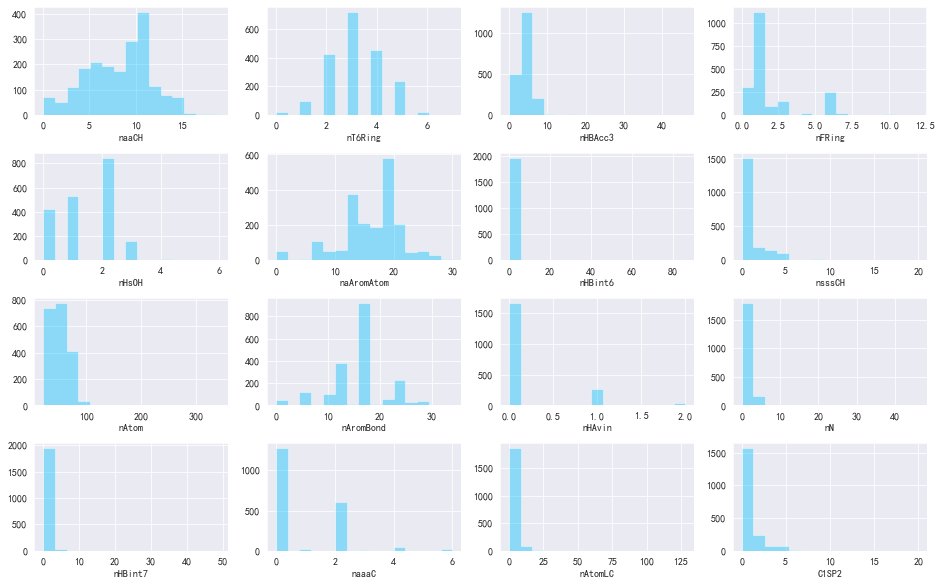

D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

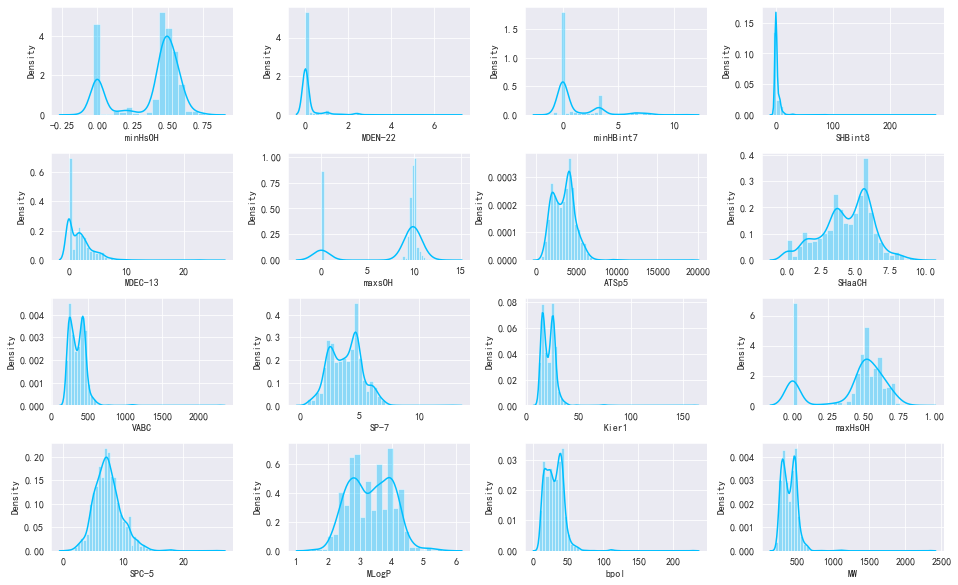

选取的整型变量为：['nT9Ring', 'nHdsCH', 'nC', 'nAtom', 'nHssNH', 'ndO', 'nF9Ring', 'nHBint6', 'nHBDon_Lipinski', 'WPATH', 'nBonds', 'nHBAcc_Lipinski', 'LipinskiFailures', 'naaO', 'nHBAcc', 'nBondsD2']
选取的浮点变量为：['SC-4', 'MAXDP', 'SHCsatu', 'SHdsCH', 'SaasC', 'maxHBa', 'WTPT-1', 'minHBint10', 'SPC-4', 'minHBint3', 'maxwHBa', 'maxHsOH', 'SHBint5', 'maxHBint9', 'maxHBint5', 'ETA_Beta_ns']


D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


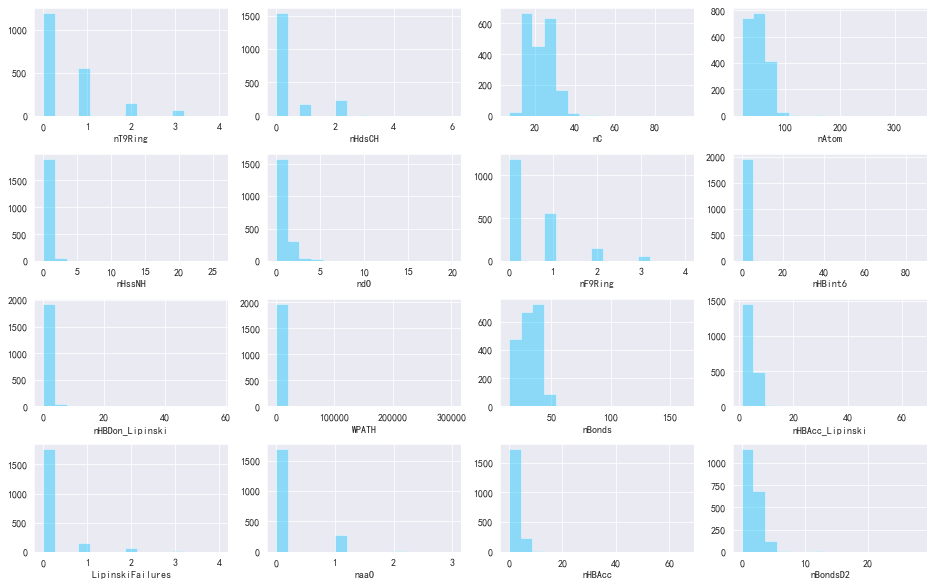

D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_toolkits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

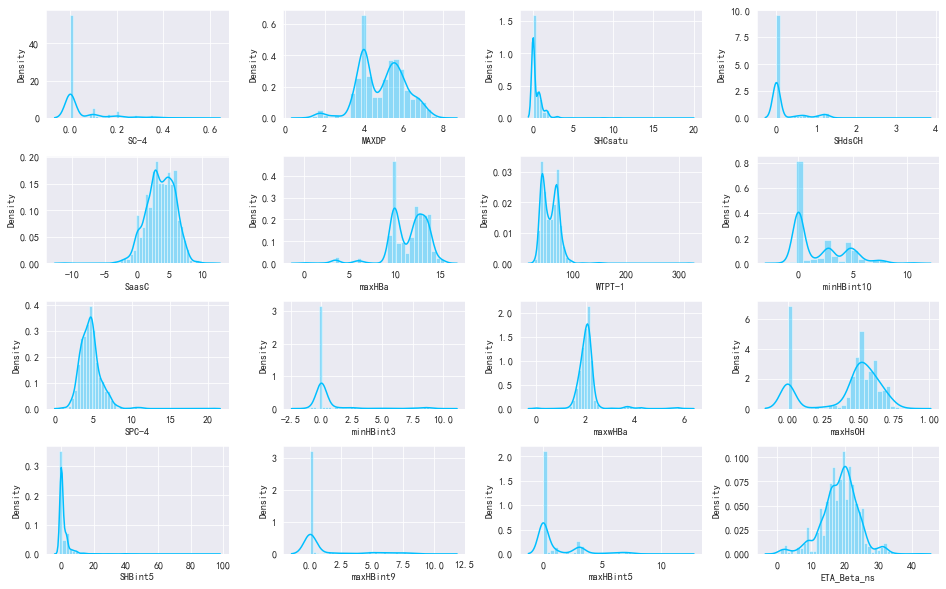

In [10]:
draw_feature(data)

In [11]:
data = pd.read_excel("./dataset/附件一：325个样本数据.xlsx", header=2)
data

,Unnamed: 0,Unnamed: 1,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量,μg/g.1",...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,1,2020/5/26 8:00:00,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,...,2.045436,6368.74700,233.310805,83086802.00,832503.795,2.216409e+03,39063124.50,1840.14470,39608757.0,0.353271
1,2,2020/5/21 8:00:00,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,...,2.025974,6360.64530,242.369205,82318954.00,803462.665,2.370587e+03,38810581.50,1641.73260,39389299.0,0.354504
2,3,2020/5/19 8:00:00,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,...,1.964696,6504.96490,233.076925,82012004.00,791925.055,2.326465e+03,38693812.00,1600.67575,39312616.5,0.350181
3,4,2020/5/14 8:00:00,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,...,2.039041,6506.82495,238.349935,81231373.50,762863.810,2.495224e+03,38410862.50,1563.71215,39120204.5,0.353930
4,5,2020/5/12 8:00:00,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,...,1.986900,6560.24225,236.576220,80915707.50,751362.300,2.807789e+03,38283000.00,1554.35740,39045953.5,0.358053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,2017/4/26 8:00:00,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,...,3.454565,8328.97475,150.441617,84087479.25,2136687.475,3.159956e+06,1569503.75,-7028.11670,1003276.5,-118.251152
321,322,2017/4/24 8:00:00,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,...,2.752566,8457.86080,148.748365,83687113.25,2129270.425,3.662122e+06,1521263.75,-8555.30420,879436.8,-118.764337
322,323,2017/4/21 8:00:00,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,...,2.935758,8246.20925,150.095445,83087625.75,2118469.700,4.415371e+06,1448903.75,-10846.08550,693676.8,-119.534108
323,324,2017/4/19 8:00:00,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,...,3.174031,7998.80235,149.533987,82696129.75,2110959.450,4.917538e+06,1400663.75,-12373.27275,569836.8,-120.047287


In [12]:
# 剔除前面的序号和时间
data = data.iloc[:,2:]
data

,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量,μg/g.1",辛烷值RON.1,RON损失\n（不是变量）,...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,1.38,...,2.045436,6368.74700,233.310805,83086802.00,832503.795,2.216409e+03,39063124.50,1840.14470,39608757.0,0.353271
1,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,1.18,...,2.025974,6360.64530,242.369205,82318954.00,803462.665,2.370587e+03,38810581.50,1641.73260,39389299.0,0.354504
2,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,1.38,...,1.964696,6504.96490,233.076925,82012004.00,791925.055,2.326465e+03,38693812.00,1600.67575,39312616.5,0.350181
3,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,1.38,...,2.039041,6506.82495,238.349935,81231373.50,762863.810,2.495224e+03,38410862.50,1563.71215,39120204.5,0.353930
4,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,1.28,...,1.986900,6560.24225,236.576220,80915707.50,751362.300,2.807789e+03,38283000.00,1554.35740,39045953.5,0.358053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,1.15,...,3.454565,8328.97475,150.441617,84087479.25,2136687.475,3.159956e+06,1569503.75,-7028.11670,1003276.5,-118.251152
321,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,87.95,1.25,...,2.752566,8457.86080,148.748365,83687113.25,2129270.425,3.662122e+06,1521263.75,-8555.30420,879436.8,-118.764337
322,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,1.35,...,2.935758,8246.20925,150.095445,83087625.75,2118469.700,4.415371e+06,1448903.75,-10846.08550,693676.8,-119.534108
323,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,88.12,1.28,...,3.174031,7998.80235,149.533987,82696129.75,2110959.450,4.917538e+06,1400663.75,-12373.27275,569836.8,-120.047287
